In [11]:
import os, shutil
original_dataset_dir='/home/xwen/work_uestc/xin_project/catsdogs/train'
base_dir='/home/xwen/work_uestc/xin_project/catsdogs/smallsets'
#os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir=os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir=os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [12]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 41s 413ms/step - loss: 0.6799 - acc: 0.5630 - val_loss: 0.6495 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 40s 397ms/step - loss: 0.6196 - acc: 0.6555 - val_loss: 0.6152 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 40s 397ms/step - loss: 0.5752 - acc: 0.6975 - val_loss: 0.6204 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 40s 398ms/step - loss: 0.5483 - acc: 0.7305 - val_loss: 0.5877 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 40s 396ms/step - loss: 0.5265 - acc: 0.7345 - val_loss: 0.6190 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 40s 399ms/step - loss: 0.5039 - acc: 0.7565 - val_loss: 0.5792 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 40s 396ms/step - loss: 0.4858 - acc: 0.7685 - val_loss: 0.5585 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 4

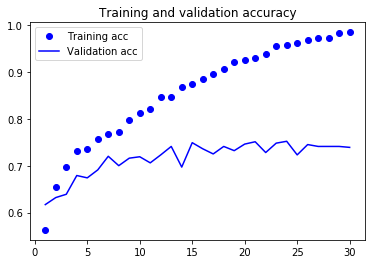

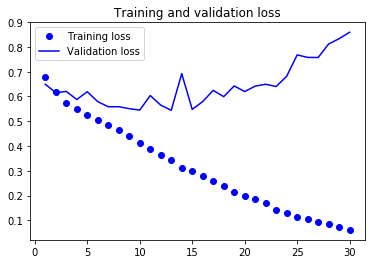

In [20]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

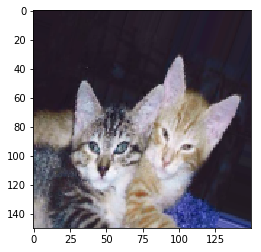

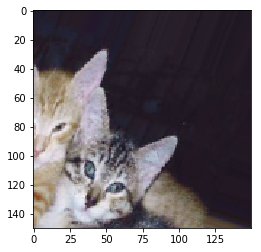

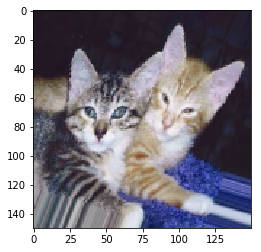

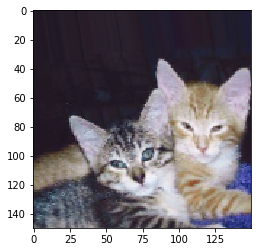

In [22]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
from keras.preprocessing import image 
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
    plt.show()

In [25]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 61s 610ms/step - loss: 0.6919 - acc: 0.5150 - val_loss: 0.6792 - val_acc: 0.5790
Epoch 2/100
100/100 [==============================] - 58s 583ms/step - loss: 0.6808 - acc: 0.5603 - val_loss: 0.6571 - val_acc: 0.5830
Epoch 3/100
100/100 [==============================] - 57s 573ms/step - loss: 0.6705 - acc: 0.5759 - val_loss: 0.6495 - val_acc: 0.5960
Epoch 4/100
100/100 [==============================] - 59s 595ms/step - loss: 0.6514 - acc: 0.6113 - val_loss: 0.6239 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 58s 578ms/step - loss: 0.6304 - acc: 0.6491 - val_loss: 0.5981 - val_acc: 0.6600
Epoch 6/100
100/100 [==============================] - 60s 603ms/step - loss: 0.6127 - acc: 0.6628 - val_loss: 0.5796 - val_acc: 0.6810
Epoch 7/100
100/100 [==============================] - 59s 586ms/step - loss: 0.6097 - acc: 0.6706 - val_loss: 0.5699 - val_acc: 0.6930
Epoch 

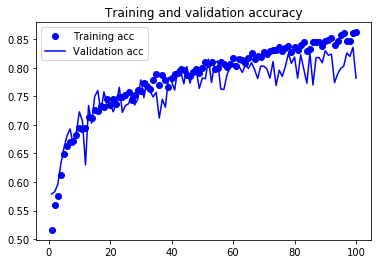

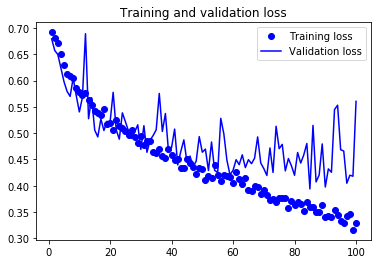

In [26]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [29]:
import os
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

base_dir='/home/xwen/work_uestc/xin_project/catsdogs/smallsets'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels
train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6124 - acc: 0.6450 - val_loss: 0.4522 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 2s 977us/step - loss: 0.4452 - acc: 0.7905 - val_loss: 0.3674 - val_acc: 0.8560
Epoch 3/30
2000/2000 [==============================] - 2s 974us/step - loss: 0.3598 - acc: 0.8455 - val_loss: 0.3258 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 2s 951us/step - loss: 0.3177 - acc: 0.8670 - val_loss: 0.3029 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 2s 977us/step - loss: 0.2883 - acc: 0.8820 - val_loss: 0.2882 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 2s 969us/step - loss: 0.2647 - acc: 0.8960 - val_loss: 0.2760 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 2s 971us/step - loss: 0.2456 - acc: 0.9100 - val_loss: 0.2768 - val_acc: 0.8850
Ep

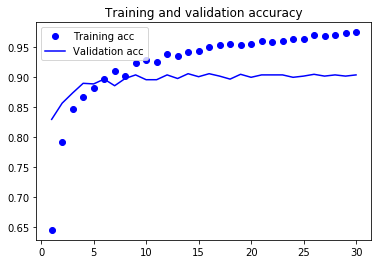

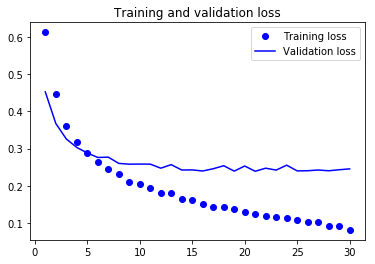

In [40]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [47]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [46]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=train_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


ValueError: Error when checking input: expected dense_12_input to have 2 dimensions, but got array with shape (20, 150, 150, 3)

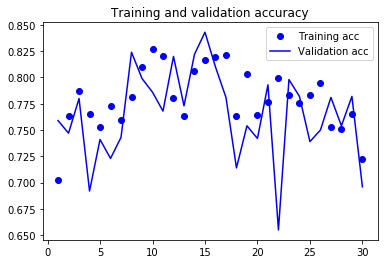

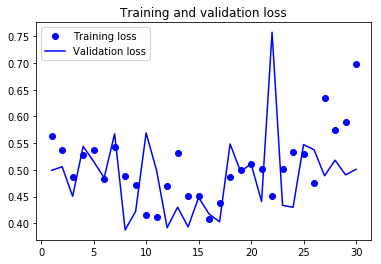

In [34]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [48]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 161s 2s/step - loss: 0.6171 - acc: 0.7555 - val_loss: 0.4624 - val_acc: 0.7890
Epoch 2/100
100/100 [==============================] - 159s 2s/step - loss: 0.4562 - acc: 0.8050 - val_loss: 0.4365 - val_acc: 0.7940
Epoch 3/100
100/100 [==============================] - 159s 2s/step - loss: 0.4015 - acc: 0.8260 - val_loss: 0.5841 - val_acc: 0.7370
Epoch 4/100
100/100 [==============================] - 159s 2s/step - loss: 0.3961 - acc: 0.8310 - val_loss: 0.4316 - val_acc: 0.8270
Epoch 5/100
100/100 [==============================] - 159s 2s/step - loss: 0.3937 - acc: 0.8315 - val_loss: 0.4377 - val_acc: 0.8370
Epoch 6/100
100/100 [==============================] - 159s 2s/step - loss: 0.3878 - acc: 0.8325 - val_loss: 0.4251 - val_acc: 0.8030
Epoch 7/100
100/100 [==============================] - 159s 2s/step - loss: 0.3648 - acc: 0.8495 - val_loss: 0.4109 - val_acc: 0.8270
Epoch 8/100
100/100 [==============================] - 160s 2s

Epoch 62/100
100/100 [==============================] - 160s 2s/step - loss: 0.3022 - acc: 0.8865 - val_loss: 0.3853 - val_acc: 0.8690
Epoch 63/100
100/100 [==============================] - 159s 2s/step - loss: 0.2617 - acc: 0.8915 - val_loss: 0.4218 - val_acc: 0.7940
Epoch 64/100
100/100 [==============================] - 160s 2s/step - loss: 0.3086 - acc: 0.8735 - val_loss: 0.3178 - val_acc: 0.8740
Epoch 65/100
100/100 [==============================] - 159s 2s/step - loss: 0.2887 - acc: 0.8790 - val_loss: 0.3681 - val_acc: 0.8370
Epoch 66/100
100/100 [==============================] - 160s 2s/step - loss: 0.2673 - acc: 0.8925 - val_loss: 0.3182 - val_acc: 0.8660
Epoch 67/100
100/100 [==============================] - 159s 2s/step - loss: 0.2759 - acc: 0.8865 - val_loss: 0.3305 - val_acc: 0.8600
Epoch 68/100
100/100 [==============================] - 159s 2s/step - loss: 0.2941 - acc: 0.8835 - val_loss: 0.3801 - val_acc: 0.8710
Epoch 69/100
100/100 [==============================] -

In [1]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [2]:
test_generator=test_datagen.flow_from_directory(testdir,target_size=(150,150),batch_size=20,class_mode='binary')
print('begain')
test_loss,test_acc=model.evaluate_generator(test_generator,tesps=50)
print('test acc:',test_acc)

NameError: name 'test_datagen' is not defined